# Car Price Prediction - Data Analysis

This notebook focuses on loading the dataset and performing Exploratory Data Analysis (EDA) to understand the data structure, distributions, and relationships.

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download latest version
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

print("Path to dataset files:", path)

# Construct path to the v4 dataset
dataset_path = os.path.join(path, "car details v4.csv")
print("Using dataset:", dataset_path)

/home/miky/UNI/ML/venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/miky/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4
Using dataset: /home/miky/.cache/kagglehub/datasets/nehalbirla/vehicle-dataset-from-cardekho/versions/4/car details v4.csv


## Load Data

In [3]:
df = pd.read_csv(dataset_path)
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Data Structure & Summary

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   str    
 1   Model               2059 non-null   str    
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   str    
 6   Transmission        2059 non-null   str    
 7   Location            2059 non-null   str    
 8   Color               2059 non-null   str    
 9   Owner               2059 non-null   str    
 10  Seller Type         2059 non-null   str    
 11  Engine              1979 non-null   str    
 12  Max Power           1979 non-null   str    
 13  Max Torque          1979 non-null   str    
 14  Drivetrain          1923 non-null   str    
 15  Length              1995 non-null   float64
 16  Width            

In [5]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


## Missing Values Analysis

In [6]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

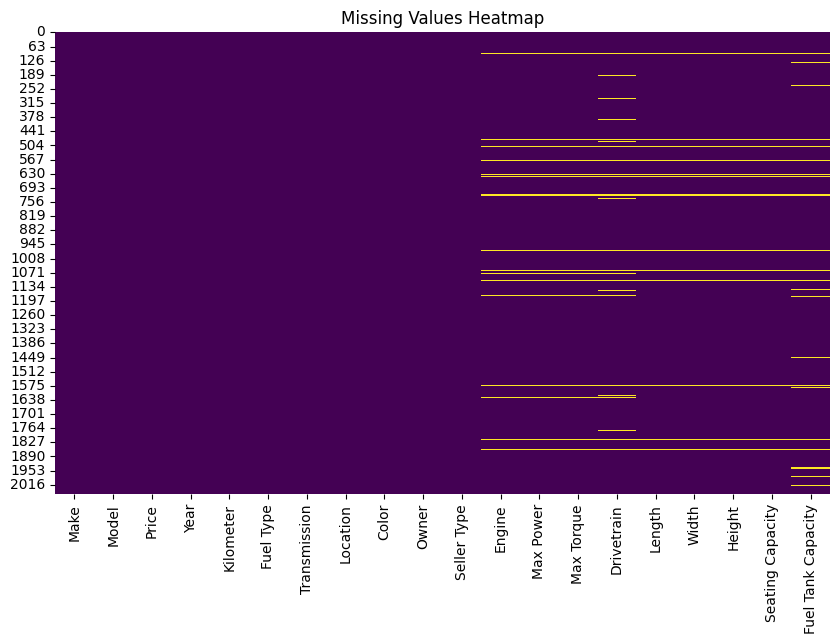

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Distributions

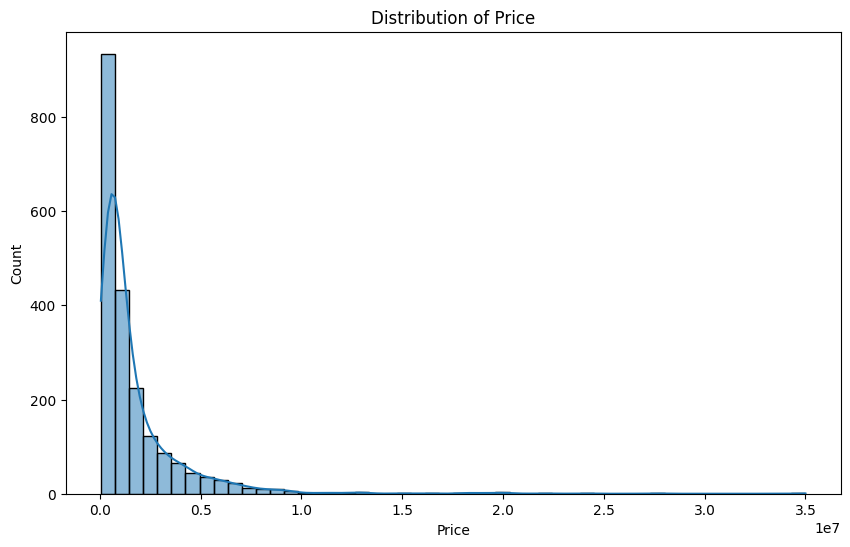

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Price')
plt.show()

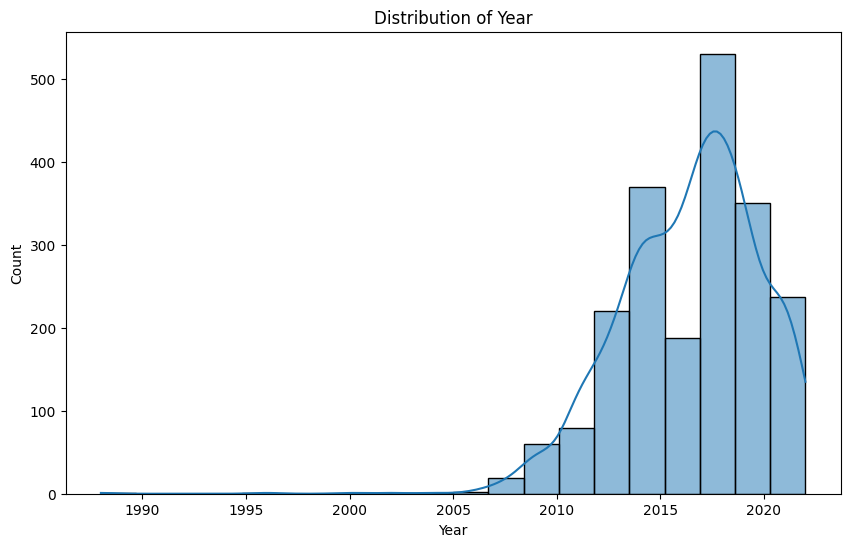

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True, bins=20)
plt.title('Distribution of Year')
plt.show()

## Categorical Features Analysis

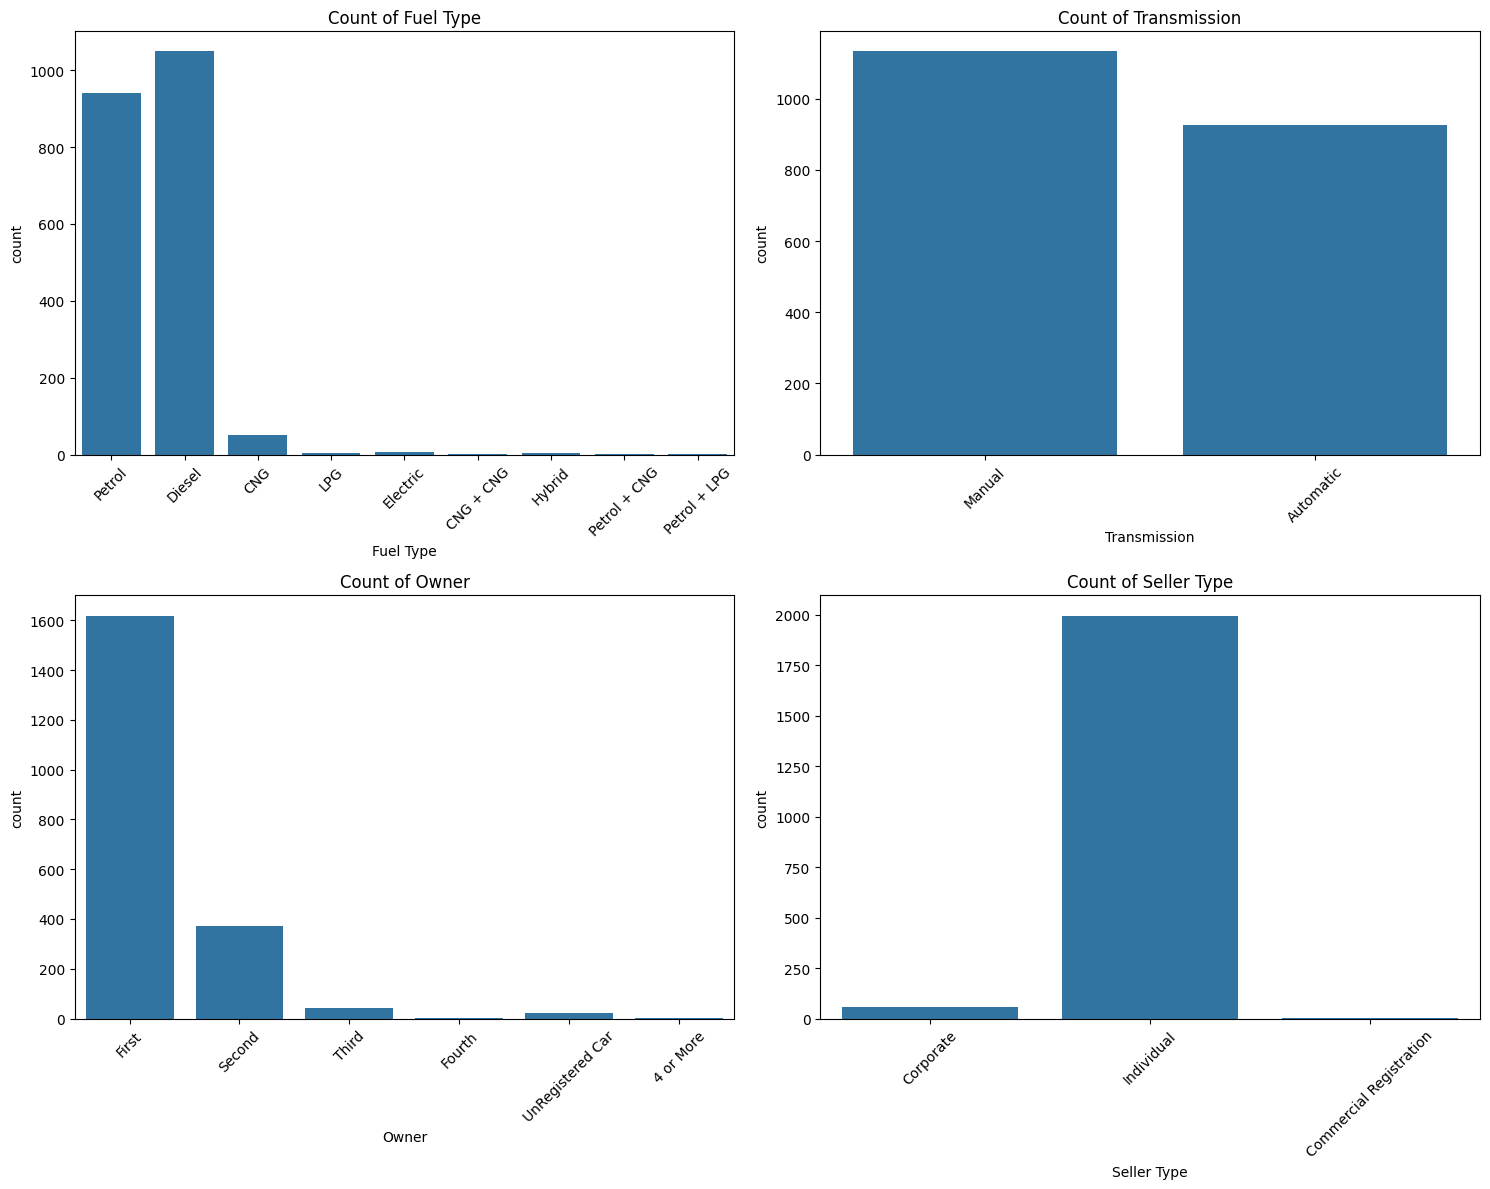

In [10]:
cat_cols = ['Fuel Type', 'Transmission', 'Owner', 'Seller Type']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Count of {col}')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Bivariate Analysis (Price vs ...)

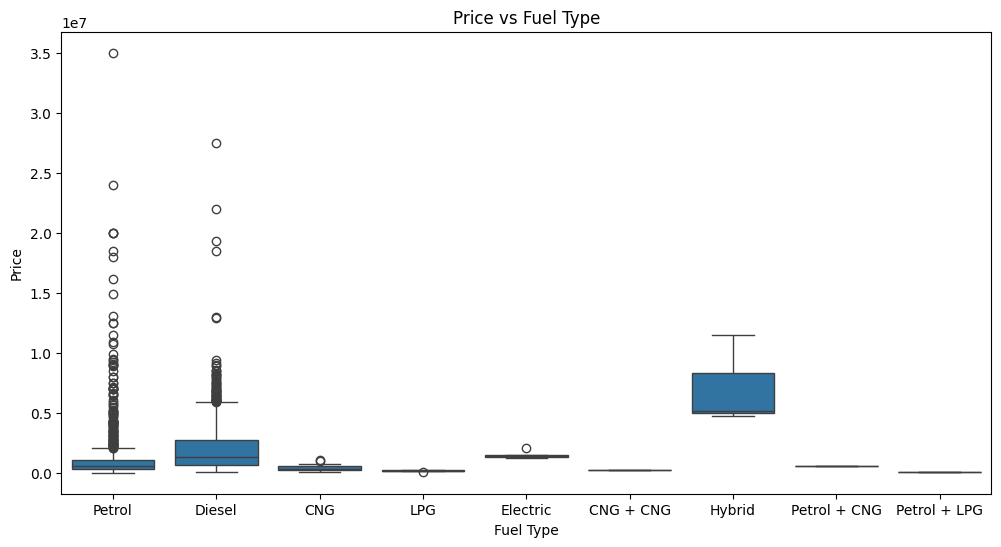

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title('Price vs Fuel Type')
plt.show()

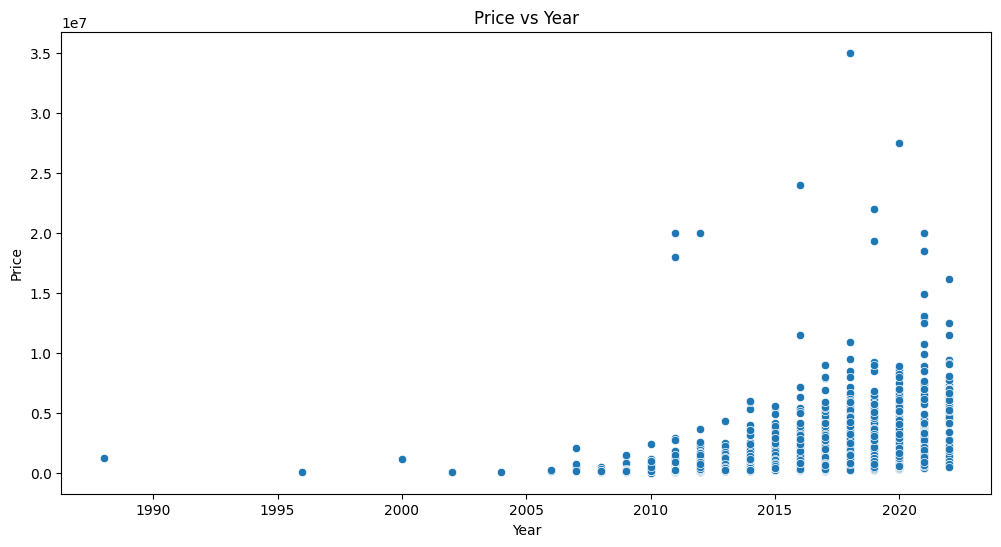

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Price vs Year')
plt.show()